In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="6" color="red">Ch 10. N차원 배열 다루기</font><b>
    <br><br>
    - [NumPy](https://numpy.org/)<br>
    - [NumpPy Doc](https://numpy.org/doc/)<br>
    - 2차원 배열은 행렬 개념으로 이해<br>
    - NumPy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)
    
# 1. NumPy 패키지

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [5]:
#np.arange(from, stop, by) : from부터 stop 앞까지 by씩 증가하는 1차원 배열 생성
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1. 배열 속성

In [6]:
from numpy import arange
a =  arange(15).reshape(3, 5) #reshpae : 3행 5열 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [7]:
type(a) #a 변수의 type

numpy.ndarray

In [8]:
a.dtype #a 배열의 요소들의 type
#정수 default int32

dtype('int32')

In [9]:
a.dtype.name

'int32'

In [10]:
a.itemsize #a 배열 안의 한 요소의 bytesize (32bit = 4byte)

4

In [11]:
a.ndim #축 개수(차원 수)

2

In [12]:
a.size #배열 요소의 개수

15

In [13]:
a.shape #배열의 구조

(3, 5)

In [15]:
print('shpae 조정 전 a\n', a) #배열 print 시에 , 없어 리스트와 구별 가능
a.shape = (5,3)
print('shape 조정 후 a\n', a)

shpae 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2. 배열 타입 변경

In [16]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [18]:
a.size

12

In [19]:
a.dtype

dtype('int32')

In [20]:
a.itemsize

4

In [21]:
#타입 변경 시 이렇게 직접 바꾸면 안 된다!
a.dtype = np.int64 #읽을 때 int64로(64bit씩) 읽는다. 
a.dtype

dtype('int64')

In [23]:
a #동일한 데이터를 32bit에서 64bit로 변경하면 읽는 방법이 바뀌어서 전혀 다른 숫자가 됨

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [24]:
#배열 요소의 타입을 수정
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
#타입을 직접 변경하는 게 아닌 셈이라, 원본에 재할당 필요
#a.astype(np.int64)
a = a.astype('int64')
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [29]:
a.itemsize

8

In [30]:
a.size

12

In [31]:
a.ravel() #return array flatten

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [32]:
a.flatten() #함수의 결과가 return되면 배열은 수정하지 않음

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3. 배열 저장
- pkl(객체/배열/머신러닝 모델 저장) | npy(NumPy 전용 포맷, io 속도 개선)

In [33]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [37]:
%%time #작업시간 측정하는 magic function (주피터노트북)
import pickle
with open('data/ch10.pkl', 'wb') as f:
    pickle.dump(a, f)

CPU times: total: 0 ns
Wall time: 996 µs


In [38]:
%%time
with open('data/ch10.pkl', 'rb') as f:
    loaded_a = pickle.load(f)

CPU times: total: 0 ns
Wall time: 1.94 ms


In [36]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [39]:
%%time
np.save('data/ch10.npy', a) #numpy객체 저장

CPU times: total: 0 ns
Wall time: 967 µs


In [40]:
%%time
loaded_a2 = np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 12.8 ms


# 2. NumPy 배열
- array() 함수를 이용하여 다른 python 구조(list, tuple)를 배열로 변환
- 기타 함수들 : arange, ones, zeros, full(255), empty, linspace, ...
- 랜덤값 함수들 : np.random.~ 머신러닝 학습 시에 자주 사용
## 2.1. array() 함수로 NumPy 배열 만들기
    - array(obj, dtype=np.xx, copy=T/F)

In [41]:
a = np.array([2,4,6], dtype=np.int16) #int default type int32
a

array([2, 4, 6], dtype=int16)

In [42]:
a[0], a[1], a[2]

(2, 4, 6)

In [43]:
for i in a:
    print(i, end='\t')

2	4	6	

In [58]:
b = np.array([[1.5, 2.3], #배열은 동일 자료형의 집합 : 정수 → 실수 → 문자 
              [4, 5]]) 
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [48]:
b[0][1], b[0,1] #2차원(axis 0행1열)

(2.3, 2.3)

In [47]:
#리스트의 경우
l = [[1.5, 2.3], [4, 5]]
l[0][1]

2.3

In [50]:
print(b.dtype) #default integer type: int32, default float type: float64
print(b.itemsize)

float64
8


In [63]:
#float64 → float32 변환 시 데이터 정확도 유실될 수 있음
b = b.astype(np.float32)
b

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [53]:
print(b.dtype)
print(b.itemsize)

float32
4


In [55]:
for row in b:
    for item in row:
        print(item, end='\t')
    print()

1.5	2.3	
4.0	5.0	


In [62]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행 {}열 : {:.1f}({:.1f})'.format(i, j, item, b[i,j]), end='\t')
    print()

0행 0열 : 1.5(1.5)	0행 1열 : 2.3(2.3)	
1행 0열 : 4.0(4.0)	1행 1열 : 5.0(5.0)	


In [85]:
#행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5], [6,7,8,9,0], [-5, -4, -3, -2, -1]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [-5, -4, -3, -2, -1]], dtype=int16)

In [76]:
#없는 인덱싱 IndexError
b[0,1]
#b[3,1] 

2

In [138]:
#슬라이싱
print('0~1행, 1~2열:\n', b[0:2,1:3])
print('2행 모두 1차원:\n', b[2,:], b[2]) #모든 열 추출할 경우, 열 생략 가능
print('2행 모두 2차원:\n', b[2:3,:], b[2:3]) #모든 열 추출할 경우, 열 생략 가능
print('4열 모두 1차원:\n', b[:,-1], b[:,4], b[...,4])
print('2행 0~3열:\n', b[2,0:4], b[2, 0:-1])
print('마지막열 제외:\n', b[:,:-1])

0~1행, 1~2열:
 [[2 3]
 [7 8]]
2행 모두 1차원:
 [-5 -4 -3 -2 -1] [-5 -4 -3 -2 -1]
2행 모두 2차원:
 [[-5 -4 -3 -2 -1]] [[-5 -4 -3 -2 -1]]
4열 모두 1차원:
 [ 5  0 -1] [ 5  0 -1] [ 5  0 -1]
2행 0~3열:
 [-5 -4 -3 -2] [-5 -4 -3 -2]
마지막열 제외:
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [-5 -4 -3 -2]]


In [98]:
#스칼라 변수
a = 10
copy_a = a #깊은 복사
print(f"a={a}, 복제본{copy_a}")
copy_a = -1
print(f"a={a}, 복제본{copy_a}")

a=10, 복제본10
a=10, 복제본-1


In [99]:
#데이터구조
a = [0, 1]
#copy_a = a #얕은 복사 : 복제본 변형하면 원본도 변형됨
copy_a = a.copy() #깊은 복사(얕은 복사의 return을 할당)
print(f"a={a}, 복제본{copy_a}")
copy_a[0] = -1
print(f"a={a}, 복제본{copy_a}")

a=[0, 1], 복제본[0, 1]
a=[0, 1], 복제본[-1, 1]


In [105]:
#NumPy 배열
c = np.array([ [1,2], [3,4] ])
#d = c #주소 할당
d = np.array(c, copy=True) #깊은 복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))
d[0,0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
2069217547952 2069217544688
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]
2069217547952 2069217544688


## 2.2. 기본값이 있는 배열 만들기
    - np.zeros(tup) : 요소들이 다 0
    - np.ones(tup) : 요소들이 다 1
    - np.full(tup, 기본값) : 요소들이 다 두 번째 매개변수(기본값)
    - np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)
✔ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64, dtype 속성을 따로 지정 가능

In [109]:
np.zeros((3,)) #3열짜리 1차원 float64 0 배열

array([0., 0., 0.])

In [113]:
x = np.zeros((2,5), dtype=np.int16)
print(x)
print(x.dtype)
print(x.itemsize)

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [115]:
np.ones((2,5), dtype=np.uint8) #uint : unsided 첫 자리 부호 없는 정수 데이터

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [119]:
np.full((4,8), 255)

array([[255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255]])

<function matplotlib.pyplot.show(close=None, block=None)>

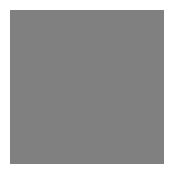

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) #시각화한 그래프 크기 figsize=(가로,세로)
img = np.full((28,28), 128, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') #축 없애기
plt.show

In [137]:
np.empty((3, 3), dtype=np.bool8) #초기값이 메모리 상태에 따라 다름(garbage값!을 적당히 넣어 둠)

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

## 2.3. 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0 이상 1 미만의 균등분포를 갖는 랜덤값 배열
- np.random.unifom(low=0.0, high=1.0, size=tup) : low 이상 high 미만의 균등 분포를 갖는 랜덤값
- np.random.normal(loc=0.0, scale=1.0, size=tup) : 평균 loc과 표준편차 scale을 갖는 정규분포 배열
- np.random.rand(n) : 0 이상 1 미만의 균등분포 1차원 배열
- np.random.randn(n) : 표준정규분포
*cf) np.random.randint(form, to) : from부터 to 미만의 정수 난수 1개 return ==random.randint(from, to-1)

In [139]:
np.random.random((2,3))

array([[0.50847976, 0.30566585, 0.79464859],
       [0.32980431, 0.15270912, 0.77677077]])

In [140]:
np.random.rand(3) #==np.random.random((3,))

array([0.72209812, 0.99205895, 0.65305839])

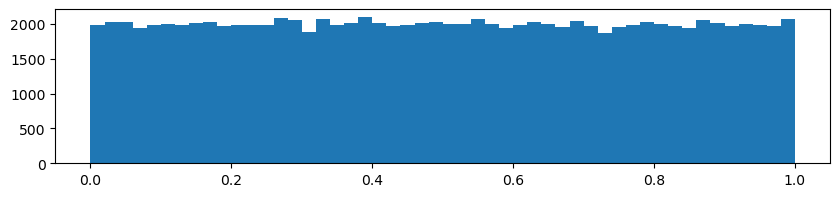

In [160]:
x = np.random.rand(100000) #균등분포
plt.figure(figsize=(10,2)) #그래프 크기
plt.hist(x, bins=50) #히스토그램
plt.show()

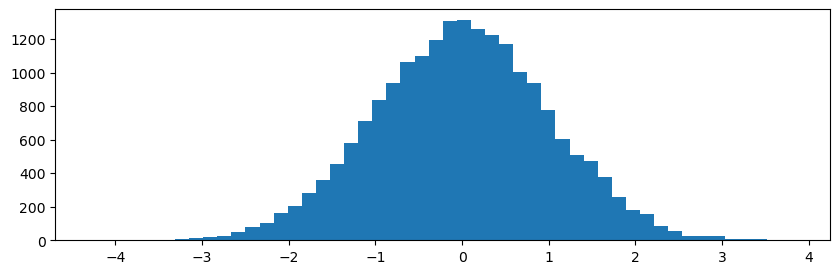

In [161]:
x = np.random.randn(20000) #표준정규분포
plt.figure(figsize=(10,3))
plt.hist(x, bins=50)
plt.show()

In [162]:
#1차원 난수 배열
print(np.random.rand(3)) #균등분포
print(np.random.randn(3)) #정규분포

[0.30962918 0.69990668 0.60268508]
[ 0.05412801 -1.04838023 -0.02865976]


In [163]:
#2차원 난수 배열
np.random.random((2,5)) #2행5열 짜리 균등분포 난수 배열

array([[0.5796296 , 0.1071697 , 0.81958461, 0.44706519, 0.9699482 ],
       [0.7752726 , 0.8510682 , 0.87579614, 0.05153401, 0.15670034]])

In [165]:
np.random.uniform(low=-2, high=2, size=(2,5)) #2행5열 짜리 균등분포(-2 ~ +2) 난수 배열

array([[-0.7103449 , -1.67424369, -0.99375405,  1.97661676,  0.79303853],
       [ 1.87992173, -1.13084377, -0.50700888, -1.06013559,  1.4871536 ]])

In [166]:
np.random.normal(size=(2,5)) #2행5열짜리 정규분포(평균 0, 표준편차1) 난수 배열

array([[-8.31368905e-01,  1.12361781e+00,  1.89752400e+00,
        -1.64612701e+00, -1.31657284e+00],
       [ 1.14813061e+00,  2.35738426e+00,  1.22632426e+00,
         8.46303406e-01, -2.30504635e-03]])

In [167]:
np.random.normal(-1, 0.5, size=(2,5)) #2행5열짜리 정규분포(평균 0, 표준편차1) 난수 배열

array([[-1.55687747, -1.1653691 , -0.56297192, -0.99349652, -1.62384013],
       [-1.29376542, -0.88570219, -0.04749272, -1.34980991, -0.56657184]])

## 2.4. 연속된 값을 갖는 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to 앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspace(from, to, num) : from부터 to까지(포함) num개 숫자들을 1차원 배열로 생성

In [169]:
np.arange(10, 30, 5, dtype=np.float64)

array([10., 15., 20., 25.])

In [170]:
np.arange(0, 2.0, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [172]:
np.linspace(0, 5, 5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [188]:
#linspace : 특정한 범위의 수들을 많이 생성할 때
from numpy import pi, linspace
x = linspace(0, 2*pi, 500)
y = np.sin(x)

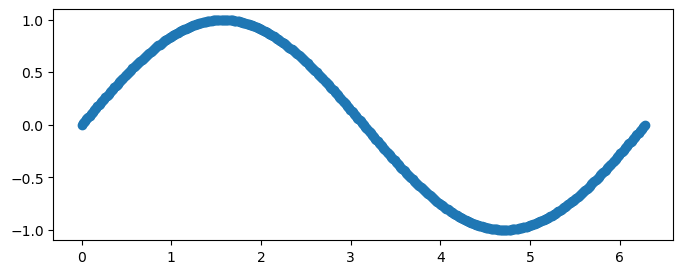

In [189]:
plt.figure(figsize=(8,3))
plt.scatter(x,y) #점그래프
plt.show()

## 2.5. 배열의 차원 변경
- reshape(행수, 열수) : -1 가능
- resize(행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않음. 실행결과가 없으면 배열이 수정됨.

In [195]:
t = np.random.random((2,3))
t

array([[0.53347018, 0.19643132, 0.95141019],
       [0.84134696, 0.41006946, 0.27189857]])

In [196]:
a = np.round(t*10) #반올림
a

array([[ 5.,  2., 10.],
       [ 8.,  4.,  3.]])

In [198]:
a = a.astype(np.int16)
a

array([[ 5,  2, 10],
       [ 8,  4,  3]], dtype=int16)

In [199]:
a.reshape(3,2) #같은 순서로 배치만 변경

array([[ 5,  2],
       [10,  8],
       [ 4,  3]], dtype=int16)

In [200]:
a.reshape(-1, 1) # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[ 5],
       [ 2],
       [10],
       [ 8],
       [ 4],
       [ 3]], dtype=int16)

In [201]:
a.reshape(3, -1)

array([[ 5,  2],
       [10,  8],
       [ 4,  3]], dtype=int16)

In [204]:
a.resize((3,2)) #튜플로도 넣을 수 있음
a```

array([[ 5,  2],
       [10,  8],
       [ 4,  3]], dtype=int16)

In [206]:
#전치행렬 T (x행y열 -> y행x열)
a.T #a의 전치행렬

array([[ 5, 10,  4],
       [ 2,  8,  3]], dtype=int16)

In [207]:
a.transpose()

array([[ 5, 10,  4],
       [ 2,  8,  3]], dtype=int16)

## 2.6. 배열 출력

In [210]:
np.arange(1001)

array([   0,    1,    2, ...,  998,  999, 1000])

In [208]:
#배열 요소가 몇 개까지 다 출력되나
#1000개 요소 이상은 출력 생략됨
np.get_printoptions()['threshold']

1000

In [209]:
#배열이 커서 인쇄가 안 되는 경우 : 모서리 부분만 출력
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [ ]:
# 인쇄 옵션 변경
import sys
np.set_printoptions(threshold=sys.maxsize) # 정수 최대치까지 출력가능
np.set_printoptions(threshold=np.inf) # 무한대까지 출력가능

## 2.7. 기본 연산 동작
### 2.7.1. 배열의 요소별 연산

In [3]:
import numpy as np

In [6]:
#리스트
a = [10, 20, 30, 40]
b = list(range(4))
a, b

([10, 20, 30, 40], [0, 1, 2, 3])

In [8]:
#배열 (numpy array)
a = np.array([10, 20, 30, 40])
b = np.arange(4)
a, b

(array([10, 20, 30, 40]), array([0, 1, 2, 3]))

In [12]:
#요소별 + 연산
a + b

array([10, 21, 32, 43])

In [13]:
#요소별 * 연산
a * 3

array([ 30,  60,  90, 120])

In [14]:
#요소별 * 연산
a * b

array([  0,  20,  60, 120])

In [15]:
#요소별 ** 연산
a ** b

array([    1,    20,   900, 64000])

In [17]:
#요소별 논리 연산
a < 40

array([ True,  True,  True, False])

In [18]:
a[[0,3]] #0, 3번째 index item

array([10, 40])

In [19]:
a[[True, False, False, True]] #각 요소 선택에 o/x

array([10, 40])

In [20]:
#a 배열에서 40보다 작은 데이터만 추출 (boolean indexing)
a[a<40]

array([10, 20, 30])

In [21]:
#a 배열에서 40보다 작은 데이터의 index
np.where(a<40)

(array([0, 1, 2], dtype=int64),)

### 2.7.2 행렬의 곱 (@, dot 함수)
- cf. *(요소별 곱)
- MxN 행렬 @ NxR 행렬 = MxR 행렬

In [22]:
A = np.array([ [1,1], 
               [0,1]])
B = np.array([ [2,0],
               [3,4]])
A, B

(array([[1, 1],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [26]:
print('요소별 곱 A*B = ', A*B, sep='\n')
print('행렬곱 A@B = ', A@B, sep='\n')
print('행렬곱 A.dot(B) = ', A.dot(B), sep='\n')

요소별 곱 A*B = 
[[2 0]
 [0 4]]
행렬곱 A@B = 
[[5 4]
 [3 4]]
행렬곱 A.dot(B) = 
[[5 4]
 [3 4]]


In [28]:
#일반적으로는 행렬곱은 교환법칙이 성립 안 함
print('A@B =', A@B, sep='\n')
print('B@A =', B@A, sep='\n')

A@B =
[[5 4]
 [3 4]]
B@A =
[[2 2]
 [3 7]]


In [29]:
#PDF 자료 p.19 확인 (1)
A = np.array([ [1,2], 
               [3,4]])
B = np.array([ [-1,-1],
               [1,1]])
A@B, B@A

(array([[1, 1],
        [1, 1]]),
 array([[-4, -6],
        [ 4,  6]]))

In [32]:
#PDF 자료 p.19 확인 (2)
A = np.array([ [1,2], 
               [3,4]])
B = np.array([ [6],
               [7]])
A@B, #B@A는 에러

(array([[20],
        [46]]),)

In [30]:
#PDF 자료 p.19 확인 (3)
A = np.array([ [1,2,3], 
               [3,4,1]])
B = np.array([ [0,0],
               [1,1],
               [-1,2]])
A@B, B@A

(array([[-1,  8],
        [ 3,  6]]),
 array([[ 0,  0,  0],
        [ 4,  6,  4],
        [ 5,  6, -1]]))

In [33]:
#단위행렬에서는 교환법칙 성립
#PDF 자료 p.19 확인 (4)
A = np.array([ [2,0], 
               [3,4]])
B = np.array([ [1,0],
               [0,1]])
A@B, B@A

(array([[2, 0],
        [3, 4]]),
 array([[2, 0],
        [3, 4]]))

In [34]:
np.eye(2) #2행2열짜리 단위행렬

array([[1., 0.],
       [0., 1.]])

In [35]:
np.eye(3) #3행3열짜리 단위행렬

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 2.7.3. 복합대입연산자의 사용 (+=, -=, *=, ...)
- 배열에서의 a += b 는 a= a+b와 다소 다르게 작동한다. 잘 사용하지 않음.

In [41]:
a = np.ones((2,3), dtype='int8') #2행3열짜리 int8 배열
b = np.random.random((2,3)) #2행3열짜리 random값(0~1 균등분포) float64 배열
print(a, b, sep='\n')

[[1 1 1]
 [1 1 1]]
[[0.67614273 0.75112173 0.64337368]
 [0.82948293 0.95978965 0.36206164]]


In [42]:
a += 3
a

array([[4, 4, 4],
       [4, 4, 4]], dtype=int8)

In [43]:
a = a + 3
a

array([[7, 7, 7],
       [7, 7, 7]], dtype=int8)

In [44]:
a += 256 #a+256 결과를 a에 넣는데, 공간이 부족하면 앞이 짤림 (연산 무효)
a

array([[7, 7, 7],
       [7, 7, 7]], dtype=int8)

In [45]:
a = a + 256 #a+256 결과를 새로운 a에 할당
a

array([[263, 263, 263],
       [263, 263, 263]], dtype=int16)

In [46]:
# a는 int16, b는 float64
b.dtype

dtype('float64')

In [47]:
b += a # b+a의 결과를 b에 넣는다
b

array([[263.67614273, 263.75112173, 263.64337368],
       [263.82948293, 263.95978965, 263.36206164]])

In [48]:
a += b # b+a의 결과를 b에 넣는다
#a 

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'

### 2.7.4. 배열 요소별 집계
- sum, min, max, mean, var(분산), std(표준편차)

In [50]:
a = np.array([[2,2,2,3], [4,3,2,1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [53]:
print('전체 합:', a.sum(), np.sum(a))
print('전체 평균:', a.mean(), np.mean(a))
print('전체 최소값:', a.min(), np.min(a))
print('전체 최대값:', a.max(), np.max(a))
print('전체 분산:', a.var(), np.var(a))
print('전체 표준편차:', a.std(), np.std(a))

전체 합: 19 19
전체 평균: 2.375 2.375
전체 최소값: 1 1
전체 최대값: 4 4
전체 분산: 0.734375 0.734375
전체 표준편차: 0.8569568250501305 0.8569568250501305


In [55]:
#분산에 루트를 씌우면 표준편차
import math
math.sqrt(a.var())
#math.sqrt(스칼라데이터) sqrt 안에 배열 등 들어가면 에러

0.8569568250501305

### 2.7.5. 배열 축별 집계
- 행별/열별 sum, min, max, mean, var, std, argmax(최대값 index)

In [62]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [60]:
#행별 합계 : axis=0(행), axis=1)열) #행을 고정하고 열(axis1축)들을 합함
print('a의 행별 합: ', a.sum(axis=1), np.sum(a, axis=1)) #같은 행 내 열들의/ 합 개념
print('a의 행별 평균: ', a.mean(axis=1), np.mean(a, axis=1))

a의 행별 합:  [ 9 10] [ 9 10]
a의 행별 병균:  [2.25 2.5 ] [2.25 2.5 ]


In [61]:
#열별 합계 : 열을 고정하고 행(axis0축)들을 합함
print('a 열별 합: ', a.sum(axis=0), np.sum(a, axis=0))
print('a의 열별 병균: ', a.mean(axis=0), np.mean(a, axis=0))

a 열별 합:  [6 5 4 4] [6 5 4 4]
a의 열별 병균:  [3.  2.5 2.  2. ] [3.  2.5 2.  2. ]


## 2.8. 그 외 요소별 계산하는 범용 함수들
- 메모리를 효율적으로 사용할 수 있음
    * np.add(A, B, C) : C=A+B
    * np.multiply(A, B, C) : C=A*B
    * np.subtract(A, B, C) : ...
    * np.sqrt(배열) : 제곱근 cf. math.sqrt(스칼라변수)

In [63]:
a = np.array([1,2])
b = np.array([3,4])
c = np.empty((2,))
a, b, c

(array([1, 2]), array([3, 4]), array([1.06099790e-313, 8.48798317e-314]))

In [65]:
%%time
np.add(a,b,c)
c

CPU times: total: 0 ns
Wall time: 0 ns


array([4., 6.])

In [66]:
%%time
c = a+b
c

CPU times: total: 0 ns
Wall time: 0 ns


array([4, 6])

In [68]:
#메모리 사용량과 속도 측정을 해 주는 메모리 프로파일러를 로드
#아나콘다 프롬프트에서 pip install memory_profiler
%load_ext memory_profiler
A = np.random.randn(100000000)
B = np.random.randn(100000000)
C = np.random.randn(100000000)
A, B, C

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


(array([-0.81351759, -0.7515202 , -1.01803881, ...,  0.66513531,
         2.49727806, -0.18975777]),
 array([-0.81998856, -1.34704228,  0.76460663, ..., -1.37180011,
         1.16143274, -1.27001655]),
 array([-0.04288599,  0.69898276,  0.50148689, ...,  0.58079206,
         1.02218794,  0.42525519]))

```
%%time : 셀 실행 시 소요시간 출력(셀 맨 위에 배치)
%memit : 메모리 사용량 출력
↓ 범용함수가 더 메모리 사용도 적고 빠름 
```

In [72]:
%%time
%memit G = A*B + C
print(G)

peak memory: 4567.73 MiB, increment: 1410.61 MiB
[ 0.62418913  1.71131224 -0.27691233 ... -0.33164062  3.92260843
  0.6662507 ]
CPU times: total: 500 ms
Wall time: 1.18 s


In [73]:
%%time
%memit np.multiply(A,B,G); np.add(G,C,G)
print(G)

peak memory: 3151.65 MiB, increment: 0.00 MiB
[ 0.62418913  1.71131224 -0.27691233 ... -0.33164062  3.92260843
  0.6662507 ]
CPU times: total: 250 ms
Wall time: 953 ms


## 2.9. 브로드캐스팅
- 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해 주는 강력한 기능

In [74]:
a = np.array([1,2,3])
b = 10
print(a+b) #요소별 연산
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [77]:
#1차원 배열의 브로드캐스팅
a = np.array([1,2,3])
b = np.array([10]) #[10,10,10]으로 간주
print(a+b)
print(a*b)
print(np.add(a,b))

[11 12 13]
[10 20 30]
[11 12 13]


In [78]:
#2차원 배열의 브로드캐스팅
a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]]) #4x3 2차원 배열
b = np.array([0,1,2]) #3열짜리 1차원 배열, 1행 내용이 나머지 행으로 복사되듯
np.add(a,b), np.multiply(a, b)

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 array([[ 0,  0,  0],
        [ 0, 10, 20],
        [ 0, 20, 40],
        [ 0, 30, 60]]))

In [79]:
#2차원 배열의 브로드캐스팅
a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]]) #4x3 2차원 배열
b = np.array([[0],[1],[2],[3]]) #4행1열 1차원 배열
np.add(a,b), np.multiply(a, b)

(array([[ 0,  0,  0],
        [11, 11, 11],
        [22, 22, 22],
        [33, 33, 33]]),
 array([[ 0,  0,  0],
        [10, 10, 10],
        [40, 40, 40],
        [90, 90, 90]]))

In [86]:
#a, b를 모든 쌍 조합에 대해 계산하고 싶을 때
a = np.array([0, 10, 20, 30]) #4열짜리 1차원 배열
b = np.array([1, 2, 3])
#1차원 배열 a를 2차원 배열 A로 전환
#방법 1 차원 변환
A = a.reshape(4,1)
#방법 1-1. 차원 변환(권장) : reshape(-1, ) '알아서 맞춰'
A = a.reshape(-1,1)
#방법 2. 새 축 추가 : newaxis를 이용해 배열에 새로운 축을 추가 →2차원
# 기존 데이터는 건드리지 않은 채 특정 위치에 새로운 차원(축)을 추가
# :는 모든 요소를 선택한다는 의미
A = a[:, np.newaxis]
#방법 3. 차원 확장 함수
# axis=1 : 새로운 차원을 1번 축(열) 위치에 추가하라는 의미.
# np.newaxis보다 코드가 길지만, 어떤 축에 차원을 추가하는지 명시하므로 코드 가독성을 높일 수 있음
A = np.expand_dims(a, axis=1)
A

array([[ 0],
       [10],
       [20],
       [30]])

In [87]:
a = np.array([0, 10, 20, 30]) #4열짜리 1차원 배열
b = np.array([1, 2, 3])
#방법 4. 두 배열을 입력받아, 이 두 배열이 서로 브로드캐스팅(모든 쌍 조합) 연산을 할 수 있도록 가장 효율적인 2차원 배열 형태로 변환하여 튜플로 반환하는 특수 함수
A, B = np.ix_(a, b)
A, B

(array([[ 0],
        [10],
        [20],
        [30]]),
 array([[1, 2, 3]]))

In [85]:
A + b #A and b both broadcasted as 4x3 each.

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

# 3. 배열 합치기/분리하기
- 두 배열을 합치는 함수
- r_, c_
- 슬라이싱
- 하나의 배열을 여러 개 작은 배열로 분리하는 함수

## 3.1. 슬라이싱

In [88]:
c = np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [89]:
c[0,2,1]

9

In [90]:
#0면의 모든 데이터
c[0]
#c[0, :, :]
#c[0, ...]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [92]:
#1면0행의 모든 데이터
c[1,0]
#c[1,0,:]
#c[1,0,...]

array([12, 13, 14, 15])

In [94]:
#1면1열의 모든 데이터
c[1,:,1]

array([13, 17, 21])

In [99]:
#모든 면의 1~2행, 2~3열 데이터
c[:,1:3,2:4]
#c[:,1:,2:]

array([[[ 6,  7],
        [10, 11]],

       [[18, 19],
        [22, 23]]])

## 3.2. 두 개 이상의 배열을 쌓아 합치는 함수
- vstack(tup) : vertical, 아래로 추가하는 방식. 2차원 이상일 경우 열 수가 맞아야.
- hstack(tup) : horizontal, 옆으로 추가하는 방식. 2차원 이상일 경우 행 수가 맞아야.
- dstack(tup) : depth, 마지막 축(열)을 쌓아 합침(차원 증가) 짝 짓기. 3차원 결합을 강제

In [101]:
a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.vstack( (a, b) )
print('vstack 아래로 추가하여 합치기: ', v, v.shape, sep='\n')
h = np.hstack( (a, b) )
print('hstack 옆으로 추가하여 합치기: ', h, h.shape, sep='\n') 
d = np.dstack( (a, b) )
print('dstack 축을 depth로 합치기: ', d, d.shape, sep='\n')

vstack 아래로 추가하여 합치기: 
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 추가하여 합치기: 
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기: 
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [104]:
a = np.arange(24).reshape(2, 3, 4)
a, b = c #c[0]이 a, c[1]이 b
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [105]:
#수직으로 합치기
np.vstack( (a, b) ) #2차원+2차원 : 이어붙이기라 2차원

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [106]:
np.concatenate( (a, b), axis=0 ) #axis=0. 즉, 행으로, 수직으로 합치는 게 기본값

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [107]:
#수평으로 합치기
np.hstack( (a, b) )

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [108]:
np.concatenate( (a, b), axis=1 ) #axis=1, 열로 합치기

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [109]:
np.dstack( (a, b) )

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

- column_stack(tup) : 1차원 배열을 2차원 배열의 열 단위로 합침. dstack과 비교 가능
- row_stack(tup) : 행 단위로 합침 == vstack()

In [110]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])
np.column_stack( (a,b,c) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [111]:
np.dstack( (a,b,c) ).reshape(4,3) #column_stack과 같음

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [113]:
np.hstack( (a[:, np.newaxis], b[:, np.newaxis], c[:, np.newaxis]) ) #column_stack과 같음

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [114]:
#행 쌓기
np.row_stack( (a,b,c) ) #vstack과 같음

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

- stack(tup, axis=n) : axis=0은 첫 번째 차원(2차원에서는 행, 3차원에서는 면), axis=-1(열)

In [116]:
a = np.arange(12).reshape(3,4)
b = np.arange(12, 24).reshape(3,4)
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [117]:
#0면에 a, 1면에 b로 stack
np.stack((a,b), axis=0) 

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [118]:
#행(1축)끼리 합해서 면을 이룸
np.stack((a,b), axis=1)

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [119]:
#열(2축)끼리 합해서 면을 이룸
np.stack((a,b), axis=-1)

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3. r_ / c_

In [120]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])
np.r_[a,b,c] # 한 행으로

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [121]:
np.r_[[a],[b],[c]] #vstack과 결과가 같네

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [122]:
np.c_[a,b,c] #컬럼 단위로

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [123]:
np.column_stack( (a,b,c) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## 3.4. 배열을 분리하는 함수
- vsplit(ary, 정수나 벡터) : 첫 번째 축(2차원에서 가로축)을 따라 분할
- hsplit(ary, 정수나 벡터) : 두 번째 축(2차원에서 세로축)을 따라 분할
- dsplit(ary, 정수나 벡터) : depth를 따라 분할, 3차원에서만 가능
    * 정수 n : n개로 분리
    * [n] : n번째 index 기점으로 분리
    * [m, n] : m번째 부터 n번째 앞까지, n번째부터 나머지

In [124]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [125]:
#가로축을 따라 3개로 분할 (분할 후 차원 유지)
a_v = np.vsplit(a, 3)
a_v

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [126]:
#1번 행을 기점으로 가로축을 따라 분할
a_v1 = np.vsplit(a, [1])
a_v1

[array([[0, 1, 2, 3]]),
 array([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])]

In [128]:
a_h = np.hsplit(a, 2)
a_h

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [130]:
a_h1 = np.hsplit(a, [1,3])
a_h1

[array([[0],
        [4],
        [8]]),
 array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]),
 array([[ 3],
        [ 7],
        [11]])]

- split(ary, 개수나 index vector, axis=?)
- array_split(ary, 개수나 index vector, axis=?)
    - axis=0 : vsplit()과 동일
    - axis=1 : hsplit()과 동일
    - axis=2 : dsplit()과 동일
    - array_split이 split과 다른 점 : 나눠지지 않는 정수로도 사용 가능

In [131]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [132]:
np.split(a, 2, axis=0) #axis=0이면 0번축 기준으로 분리 (2차원에서 행 분리)

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [133]:
np.split(a, 2, axis=1) #axis=1이면 1번축 기준으로 분리 (2차원에서 열 분리)

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [135]:
np.split(a, 3, axis=1) #does not result in an equal division

ValueError: array split does not result in an equal division

In [139]:
np.array_split(a, 3, axis=1) #나눠서 떨어지지 않는 수로도 분리 가능

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]